In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy as cp
%matplotlib inline

##Starting Variables
The major variables that can be altered for this program. The sizes of the atoms gives the number of nucleons that will be placed within the atom. Impact_parameter is the vertical distance between the centers of the atoms. The nucleonxs is the radius of the nucleons. The tinc is the time increment that will be used for every update of the system. The x_locations are the locations of the two atoms.

In [30]:
size1 =10
size2 =10
velocity1 = 20
velocity2 = 35
#impact_parameter = 30
nucleonxs = 15
lengthofatom1 = 100 
lengthofatom2 = 100
tinc = .005
# Locations of x-coordinates for particle 1 and 2
x_location1 = -80
x_location2 = 80

##Create Atom
This function creates two atoms. The function intakes the size of the atoms, which atom is being created, the y position of the center of the atom, the velocity, and the length of the atom. The function then returns a two dimensional list containing the locations of the nucleons, their velocities, and whether or not they have participated in a collision yet. The y coordinates of each nucleon is randomly generated in the bounds of the atom.

In [3]:
def createatom(Size = 0, Numofparticle = 1, Heightchange =0, Velocity = 0, lengthofatom = 0):
    
    
    # The location of x for the particle
    if Numofparticle ==1:
        x_location = x_location1
        
        # Particles moving to the right will have positive velocity
        velofparticle = Velocity
    else:
        x_location = x_location2
        
        # Particles moving to the left will have a negative velocity
        velofparticle = -Velocity
    
    #The arrays for the x and y coordinates of the created nucleons
    x_array =[]
    y_array =[]
    
    #The arrays for the velocity in the x and y directions for the created nucleons
    vx_array =[]
    vy_array =[]
    
    # This array holds the atom to which the nucleon belongs
    nucleon_atom = []
    
    # Collision state will hold whether or not the nucleon has collided with another at a point in time
    collision_state = []
    
    #The bottom and top range are the bounds on the locations wherein the nucleons of the atoms can exist
    bottomrange = -lengthofatom/2 + Heightchange
    toprange = bottomrange + lengthofatom
    
    # The creation of the nucleons for the atom
    for i in range(Size):
        
        # Randomly choosing the y-coordinate of the nucleon
        y_location = np.random.uniform(bottomrange, toprange)
        
        # Appending the values for the location and velocity of the nucleons to the arrays 
        x_array.append(x_location)
        y_array.append(y_location)
        vx_array.append(velofparticle)
        vy_array.append(0)
        nucleon_atom.append(Numofparticle)
        collision_state.append(False)
    
    return x_array,y_array,vx_array,vy_array,nucleon_atom,collision_state

##Collision Function
This function calculates the out going trajectories of two colliding nucleons based on their incoming trajectories. The function intakes the arrays for the two atoms and the number of the nucleon within the list for each atom.

In [4]:
def collision(atom1 = [], atom2 = [], Numberinatom1 = 0, Numberinatom2 = 0):
    
    #initial positions and velocities of the nucleons
    
    x_position1 = atom1[0][Numberinatom1]
    y_position1 = atom1[1][Numberinatom1]
    x_velocity1 = atom1[2][Numberinatom1]
    y_velocity1 = atom1[3][Numberinatom1]
    
    x_position2 = atom2[0][Numberinatom2]
    y_position2 = atom2[1][Numberinatom2]
    x_velocity2 = atom2[2][Numberinatom2]
    y_velocity2 = atom2[3][Numberinatom2]
    
    
    #Velocity vector for nucleon 1 and 2
    velocity_vec1 = [x_velocity1, y_velocity1] 
    velocity_vec2 = [x_velocity2, y_velocity2] 
    
    #Vector between atom centers
    between_vector = [x_position2-x_position1, y_position2-y_position1]
    
    #Projection of nucleon velocity vector onto between_vector
    mag_velocity_vec1 = np.sqrt((velocity_vec1[0])**2+(velocity_vec1[1])**2)
    mag_velocity_vec2 = np.sqrt((velocity_vec2[0])**2+(velocity_vec2[1])**2)
    
    #changing magnitudes into floats
    float(mag_velocity_vec1)
    float(mag_velocity_vec2)
    
    #Unit vector for velocity vectors
    unit_velocity_vec1 = [x_velocity1/mag_velocity_vec1, y_velocity1/mag_velocity_vec1,0]
    unit_velocity_vec2 = [x_velocity2/mag_velocity_vec2, y_velocity2/mag_velocity_vec2,0]
    
    #Unit vector for between_vector
    mag_between_vector = np.sqrt(between_vector[0]**2+between_vector[1]**2)
    unit_between_vector = [between_vector[0]/mag_between_vector,between_vector[1]/mag_between_vector,0]
    
    #The cosine of the angle between the unit velocity vector and between_vector
    cos_vec1_between = (unit_velocity_vec1[0]*unit_between_vector[0]) + (unit_velocity_vec1[1]*unit_between_vector[1]) 
    cos_vec2_between = (unit_velocity_vec2[0]*unit_between_vector[0]) + (unit_velocity_vec2[1]*unit_between_vector[1]) 
    
    #The projected vectors in the direction of the other atom
    temp_var1 = mag_velocity_vec1 * cos_vec1_between
    temp_var2 = mag_velocity_vec2 * cos_vec2_between
    vec1_in_dir = [unit_between_vector[0]*temp_var1,unit_between_vector[1]*temp_var1]
    vec2_in_dir = [unit_between_vector[0]*temp_var2,unit_between_vector[1]*temp_var2]
    
    #print unit_between_vector
    #print unit_velocity_vec1
    #Calculating the perpendicular vector to between_vector and original vector
    temp_original1_bet_vec = np.cross(unit_between_vector,unit_velocity_vec1)
    temp_original2_bet_vec = np.cross(unit_between_vector,unit_velocity_vec2)
    
    #Calculating perpendicular vector to temp_original_bet_vec and between_vector
    original1_bet_vec = np.cross(temp_original1_bet_vec, unit_between_vector)
    original2_bet_vec = np.cross(temp_original2_bet_vec, unit_between_vector)
    
    #Projecting vector onto original_bet_vec
    
    #magnitude of original_bet_vec
    mag_original1_bet_vec = np.sqrt(original1_bet_vec[0]**2+original1_bet_vec[1]**2)
    mag_original2_bet_vec = np.sqrt(original2_bet_vec[0]**2+original2_bet_vec[1]**2)
    
    #Unit vector for original_bet_vec
    unit_original1_bet_vec = [original1_bet_vec[0]/mag_original1_bet_vec,original1_bet_vec[1]/mag_original1_bet_vec]
    unit_original2_bet_vec = [original2_bet_vec[0]/mag_original2_bet_vec,original2_bet_vec[1]/mag_original2_bet_vec]
    
    #The cosine of the angle between the unit velocity vector and original_bet_vec
    cos_vec3_between = (unit_velocity_vec1[0]*unit_original1_bet_vec[0]) + (unit_velocity_vec1[1]*unit_original1_bet_vec[1]) 
    cos_vec4_between = (unit_velocity_vec2[0]*unit_original2_bet_vec[0]) + (unit_velocity_vec2[1]*unit_original2_bet_vec[1]) 
    
    #The projected vectors in the direction away from the other atom
    temp_var3 = mag_velocity_vec1 * cos_vec3_between
    temp_var4 = mag_velocity_vec2 * cos_vec4_between
    vec1_in_opp_dir = [unit_original1_bet_vec[0]*temp_var3,unit_original1_bet_vec[1]*temp_var3]
    vec2_in_opp_dir = [unit_original2_bet_vec[0]*temp_var4,unit_original2_bet_vec[1]*temp_var4]
    
    
    
    #Switching velocities into the x-y-z space
    Vx1 = vec2_in_dir[0] + vec1_in_opp_dir[0]
    Vx2 = vec1_in_dir[0] + vec2_in_opp_dir[0]
    Vy1 = vec2_in_dir[1] + vec1_in_opp_dir[1]
    Vy2 = vec1_in_dir[1] + vec2_in_opp_dir[1]
    
    
    #Assigning the particles their new velocities
    #atom1[2][Numberinatom1] = Vx1
    #atom1[3][Numberinatom1] = Vy1
    
    #atom2[2][Numberinatom2] = Vx2
    #atom2[3][Numberinatom2] = Vy2
    
    return Vx1,Vy1,Vx2,Vy2

##Conversion from Cartesian to Polar
This function converts cartesian vectors into polar ones. 

In [5]:
def car_to_polar(vector_x = 0, vector_y = 0):

    #calculating the angle between vector and the horizonal
    #m = Velocity_y/float(Velocity_x)
    theta = np.arctan2(vector_y,vector_x)
    
    #Changing theta to a positive angle
    #if theta < 0:
    #    theta = theta + 2*np.pi
    
    #calculating magnitude of velocity
    magnitude = np.sqrt(vector_x**2 + vector_y**2)
    
    return magnitude,theta

##Updating y coordinates
This function intakes a list of the information for an atom and updates all the y coordinates so that a single atom could be used multiple times, but with their y positions translated updwards or downwards. 

In [6]:
def y_update(atom3 = None, y_change = 0):
    for i in range(len(atom3[1])):
        atom3[1][i] += y_change
    
    return atom3

#Collision Simulation
The collisionsimulation function simulates a collision between two atoms. It intakes the impact parameter between the two atoms, the atoms to be collided and whether or not a graph of the collision should be created. Once the atom collision is simulated, the function collects the final angles of the nucleons in each atom, as well as the impact parameter of the whole atom. print_state set to 0 does not print the collision diagrams while set to 1 does. 

In [23]:
def collisionsimulation(impact_parameter = 0, atom_first = None, atom_second = None, print_state = 0):
    
    atom3 = cp.deepcopy(atom_second)
    
    atom1 = cp.deepcopy(atom_first)
    atom2 = y_update(atom3 = atom3, y_change = impact_parameter)

    #print "y for 1: ",atom1[1]
    #print "y for 2: ",atom2[1]
    
    #x_sum_vel_init = 0
    #y_sum_vel_init = 0
    #for i in range(max(size1,size2)):
    #    if i < size1:
    #        x_sum_vel_init += atom1[2][i]
    #        y_sum_vel_init += atom1[3][i]
    #   if i < size2:
    #      x_sum_vel_init += atom2[2][i]
    #        y_sum_vel_init += atom2[3][i]

    if print_state == 1:
        plt.figure( figsize=(15, 5))
        plt.subplot( 131 )
        for i in range(max(size1,size2)):
            if i < size1:
                plt.gcf().gca().add_artist( plt.Circle( (atom1[0][i],atom1[1][i]), nucleonxs,color='r' ) )
                plt.gcf().gca().add_artist( plt.Circle( (atom1[0][i],atom1[1][i]), nucleonxs,color='g', fill = False ) )
                if atom1[5][i] == True:
                    plt.quiver(atom1[0][i], atom1[1][i], atom1[2][i], atom1[3][i],angles='xy',scale=214,color='g')
                else:
                    plt.quiver(atom1[0][i], atom1[1][i], atom1[2][i], atom1[3][i],angles='xy',scale=214,color='m')
            if i < size2:
                plt.gcf().gca().add_artist( plt.Circle( (atom2[0][i],atom2[1][i]), nucleonxs,color='b' ) )
                plt.gcf().gca().add_artist( plt.Circle( (atom2[0][i],atom2[1][i]), nucleonxs,color='g', fill = False ) )
                if atom2[5][i] == True:
                    plt.quiver(atom2[0][i], atom2[1][i], atom2[2][i], atom2[3][i],angles='xy',scale=214,color='g')
                else:
                    plt.quiver(atom2[0][i], atom2[1][i], atom2[2][i], atom2[3][i],angles='xy',scale=214,color='m')
        plt.xlim(-300,300)
        plt.ylim(-300,300)

    graph = 0

    for k in range(1500):


        #running through the particles and updating their locations
        for i in range(size1):
            atom1[0][i] = atom1[0][i] + atom1[2][i] * tinc
            atom1[1][i] = atom1[1][i] + atom1[3][i] * tinc

        for i in range(size2):
            atom2[0][i] = atom2[0][i] + atom2[2][i] * tinc
            atom2[1][i] = atom2[1][i] + atom2[3][i] * tinc

        for i in range(size1):
            for k in range(size2):
                if atom1[5][i] == False and atom2[5][k] == False:
                #if True == True:
                    distance = np.sqrt((atom1[1][i]-atom2[1][k])**2 + (atom1[0][i]-atom2[0][k])**2)
                    if distance <= 2*nucleonxs:
                        temp_var = collision(atom1 = atom1, atom2 = atom2, Numberinatom1 = i, Numberinatom2 = k)
                        atom1[2][i] = temp_var[0]
                        atom1[3][i] = temp_var[1]
                        atom2[2][k] = temp_var[2]
                        atom2[3][k] = temp_var[3]
                        atom1[5][i] = True
                        atom2[5][k] = True
                        if print_state == 1:
                            if graph == 0:
                                plt.subplot( 132 )
                                for i in range(max(size1,size2)):
                                    if i < size1:
                                        plt.gcf().gca().add_artist( plt.Circle( (atom1[0][i],atom1[1][i]), nucleonxs,color='r' ) )
                                        plt.gcf().gca().add_artist( plt.Circle( (atom1[0][i],atom1[1][i]), nucleonxs,color='g', fill = False ) )
                                    if i < size2:
                                        plt.gcf().gca().add_artist( plt.Circle( (atom2[0][i],atom2[1][i]), nucleonxs,color='b' ) )
                                        plt.gcf().gca().add_artist( plt.Circle( (atom2[0][i],atom2[1][i]), nucleonxs,color='g', fill = False ) )
                                plt.xlim(-300,300)
                                plt.ylim(-300,300)
                                graph = 1
                                
    if print_state == 1:
        plt.subplot( 133 )
        for i in range(max(size1,size2)):
            if i < size1:
                plt.gcf().gca().add_artist( plt.Circle( (atom1[0][i],atom1[1][i]), nucleonxs,color='r' ) )
                plt.gcf().gca().add_artist( plt.Circle( (atom1[0][i],atom1[1][i]), nucleonxs,color='g', fill = False ) )
                if atom1[5][i] == True:
                    plt.quiver(atom1[0][i], atom1[1][i], atom1[2][i], atom1[3][i],angles='xy',scale=214,color='g')
                else:
                    plt.quiver(atom1[0][i], atom1[1][i], atom1[2][i], atom1[3][i],angles='xy',scale=214,color='m')
            if i < size2:
                plt.gcf().gca().add_artist( plt.Circle( (atom2[0][i],atom2[1][i]), nucleonxs,color='b' ) )
                plt.gcf().gca().add_artist( plt.Circle( (atom2[0][i],atom2[1][i]), nucleonxs,color='g', fill = False ) )
                if atom2[5][i] == True:
                    plt.quiver(atom2[0][i], atom2[1][i], atom2[2][i], atom2[3][i],angles='xy',scale=214,color='g')
                else:
                    plt.quiver(atom2[0][i], atom2[1][i], atom2[2][i], atom2[3][i],angles='xy',scale=214,color='m')
        plt.xlim(-300,300)
        plt.ylim(-300,300)  
    
    angle1 = []
    angle2 = []
    
    
    for k in range(len(atom1[0])):
        temp_val = car_to_polar(vector_x = atom1[2][k], vector_y = atom1[3][k])
        angle1.append(temp_val[1])
        
    for k in range(len(atom2[0])):
        temp_val = car_to_polar(vector_x = atom2[2][k], vector_y = atom2[3][k])
        angle2.append(temp_val[1])
        

    #x_sum_vel_final = 0
    #y_sum_vel_final = 0

    #for i in range(max(size1,size2)):
    #    if i < size1:
    #        x_sum_vel_final += atom1[2][i]
    #        y_sum_vel_final += atom1[3][i]
    #    if i < size2:
    #        x_sum_vel_final += atom2[2][i]
    #        y_sum_vel_final += atom2[3][i]

    #print ("x initial = ",x_sum_vel_init, ". x final = ",x_sum_vel_final)
    #print ("y initial = ",y_sum_vel_init, ". y final = ",y_sum_vel_final)
    
    return angle1,angle2,impact_parameter, atom1[2], atom2[2], atom1[3], atom2[3];

##Simulation of a Collision
The two atoms are created and these atoms as well as an impact parameter are fed into the collision simulation. The function prints out the atoms before collision, at the moment of collision, and after the collision. The vectors are magenta if the nucleon has not participated in a collision and green if it has. 

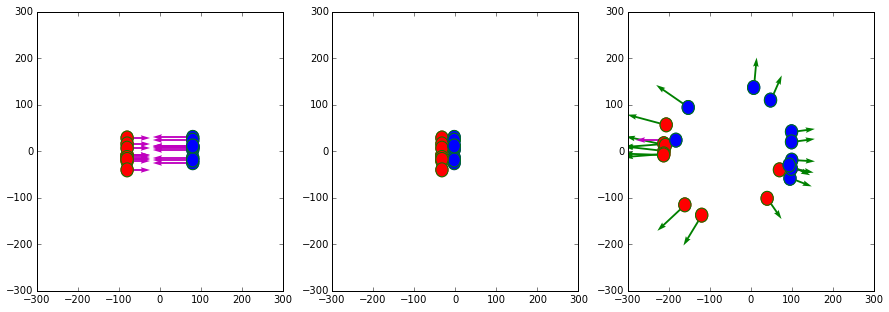

In [32]:
atom1 = createatom(size1, 1, 0, velocity1, 80)
atom2 = createatom(size2, 2, 0, velocity2, 80)
collisionsimulation(impact_parameter = 0, atom_first = atom1, atom_second= atom2, print_state = 1);

##Many collisions
Many_collisionsimulation creates num_collision number of atom collisions, all varrying in impact parameter between min_impactparam and max_impactparam. The impact parameter in this range is generated randomly. While the specified number of collisions is taking place, the trajectory angles of all the nucleons is collected and eventually graphed out. 

In [9]:
def many_collisionsimulation(num_collisions = 0, min_impactparam = 0, max_impactparam = 0):
    
    atom1 = createatom(Size = size1, Numofparticle = 1, Heightchange =0, Velocity = velocity1, lengthofatom = lengthofatom1)
    atom2 = createatom(Size = size2, Numofparticle = 2, Heightchange =0, Velocity = velocity2, lengthofatom = lengthofatom2)
    
    impact_parameters = []
    angles1 = []
    angles2 = []
    vx1 = []
    vx2 = []
    vy1 = []
    vy2 = []
    
    for l in range(num_collisions):
        impact_pam = np.random.uniform(min_impactparam,max_impactparam)
        
        #print impact_pam
        
        temp_var = collisionsimulation(impact_parameter = impact_pam, atom_first = atom1, atom_second= atom2)
        impact_parameters.append(temp_var[2])
        angles1.append(temp_var[0])
        angles2.append(temp_var[1])
        vx1.append(temp_var[3])
        vx2.append(temp_var[4])
        vy1.append(temp_var[5])
        vy2.append(temp_var[6])
        
        #print angles1
        
    plt.figure( figsize=(15, 13)) 
    plt.subplots_adjust(wspace=.2, hspace=.5)
    
    for j in range(num_collisions):
        impacts=np.empty(len(angles1[j])); impacts.fill(impact_parameters[j])
        plt.subplot( 321 )
        plt.scatter(angles1[j], impacts, alpha=0.5)
        plt.xlim(-3.2,3.2)
        plt.title("atom1 angles")
        plt.xlabel("Trajectory Angles")
        plt.ylabel("Impact Parameters")
        
    for j in range(num_collisions):
        impacts=np.empty(len(angles2[j])); impacts.fill(impact_parameters[j])
        plt.subplot( 322 )
        plt.scatter(angles2[j], impacts, alpha=0.5)
        plt.xlim(-3.2,3.2)
        plt.title("atom2 angles")
        plt.xlabel("Trajectory Angles")
        plt.ylabel("Impact Parameters")
        
    for j in range(num_collisions):
        impacts=np.empty(len(vx1[j])); impacts.fill(impact_parameters[j])
        plt.subplot( 323 )
        plt.scatter(vx1[j], impacts, alpha=0.5)
        #plt.xlim(-3.2,3.2)
        plt.title("atom1 x-velocity")
        plt.xlabel("x-component of velocity")
        plt.ylabel("Impact Parameters")
        
    for j in range(num_collisions):
        impacts=np.empty(len(vx2[j])); impacts.fill(impact_parameters[j])
        plt.subplot( 324 )
        plt.scatter(vx2[j], impacts, alpha=0.5)
        #plt.xlim(-3.2,3.2)
        plt.title("atom2 x-velocity")
        plt.xlabel("x-component of velocity")
        plt.ylabel("Impact Parameters")
        
    for j in range(num_collisions):
        impacts=np.empty(len(vy1[j])); impacts.fill(impact_parameters[j])
        plt.subplot( 325 )
        plt.scatter(vy1[j], impacts, alpha=0.5)
        #plt.xlim(-3.2,3.2)
        plt.title("atom1 y-velocity")
        plt.xlabel("y-component of velocity")
        plt.ylabel("Impact Parameters")
    
    for j in range(num_collisions):
        impacts=np.empty(len(vy2[j])); impacts.fill(impact_parameters[j])
        plt.subplot( 326 )
        plt.scatter(vy2[j], impacts, alpha=0.5)
        #plt.xlim(-3.2,3.2)
        plt.title("atom2 y-velocity")
        plt.xlabel("y-component of velocity")
        plt.ylabel("Impact Parameters")
    plt.show()

##Many Collisions Simulation
Many simulations are run and the results are graphed below. For every impact parameter on the y-axis, the information for each nucleon in that collision is spread on the x-axis. The left column is for atom1 and the right is for atom2. the values graphed are outgoing angles, x-component of velocity, and y-component of velocity. 

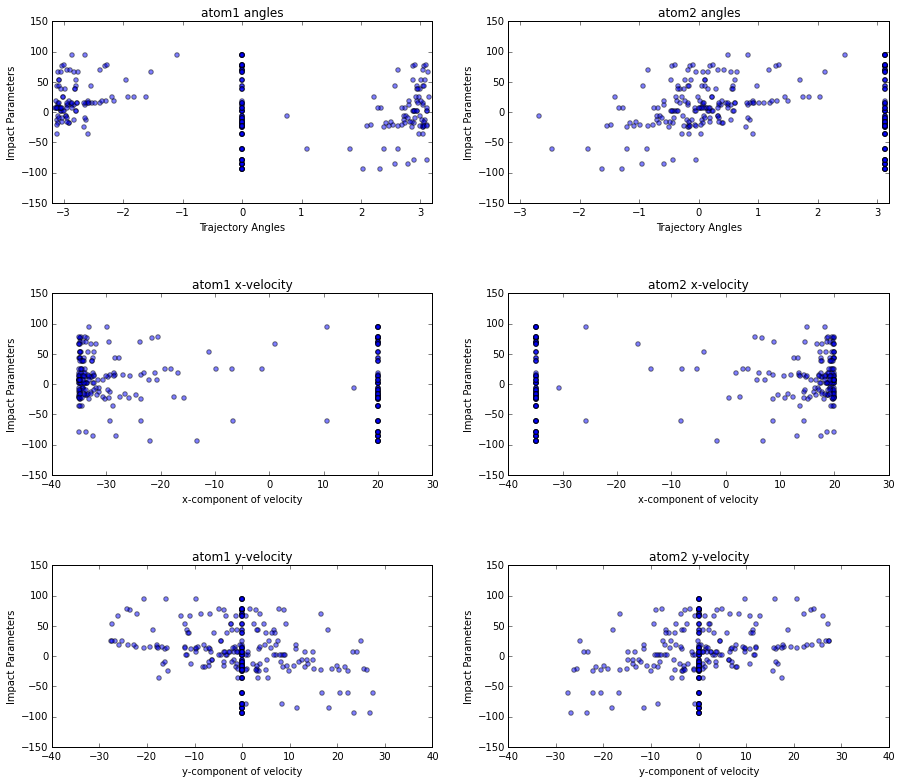

In [10]:
many_collisionsimulation(num_collisions = 30, min_impactparam = -lengthofatom1, max_impactparam = lengthofatom1)